# Лабораторная работа 11

Алгоритм коррекции по ошибке

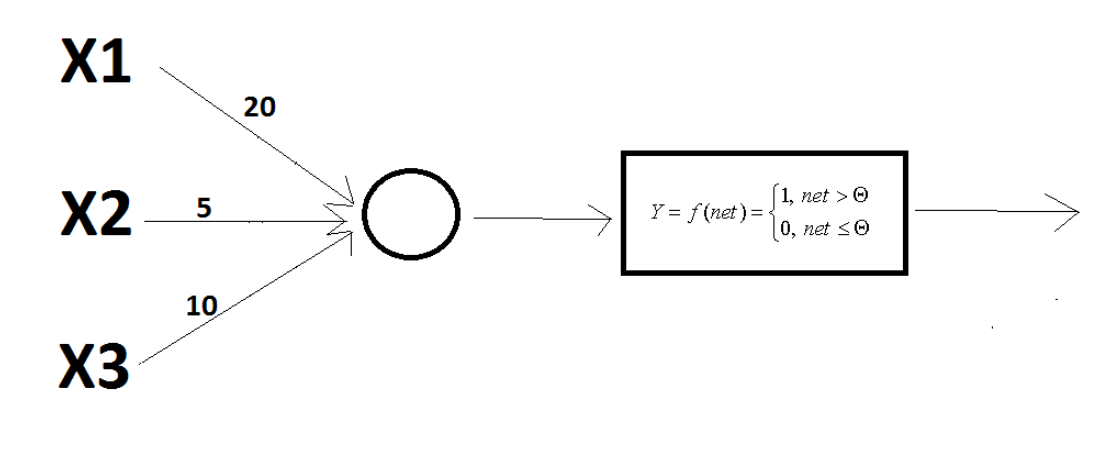

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def f(net, thetta=10):
    return 1 if net>thetta else 0 

def simple_net(train, target, weights=[], max_iter=100, learning_rate=0.99, display=False):
    if len(weights) == 0:
        weights = 2 * np.random.random((len(train[0]), 1)) - 1
    errs = []
    epoch = 0
    while True:
        epoch += 1
        sum_err = 0
        old_weights = np.copy(weights)
        if display:
            print(f"\n--------------------\nStart of epoch {epoch}")
        for row in range(len(train)):
            input_layer = train[row].reshape(1, 3)
            outputs = f(np.dot(input_layer, weights))

            err = target[row].reshape(1, 1) - outputs
            weights = weights + np.dot(input_layer.T, learning_rate * err)
            if display:
                print('weights', *weights)
            sum_err += abs(err[0][0])
        errs.append(sum_err)
        if (old_weights == weights).all():
            print(f"in epoch {epoch} weights are not changed")
            return weights, errs, epoch
        if epoch >= max_iter:
            print(f"max iterations {max_iter} exceed")
            return weights, errs, epoch
        
def predict(test, weights):
    return f(np.dot(test, weights))


--------------------
Start of epoch 1
weights [20.] [5.5] [10.]
weights [19.5] [5.5] [10.]
weights [19.] [5.] [9.5]
weights [19.] [5.] [9.5]

--------------------
Start of epoch 2
weights [19.] [5.5] [9.5]
weights [18.5] [5.5] [9.5]
weights [18.] [5.] [9.]
weights [18.] [5.] [9.]

--------------------
Start of epoch 3
weights [18.] [5.5] [9.]
weights [17.5] [5.5] [9.]
weights [17.] [5.] [8.5]
weights [17.] [5.] [8.5]

--------------------
Start of epoch 4
weights [17.] [5.5] [8.5]
weights [16.5] [5.5] [8.5]
weights [16.] [5.] [8.]
weights [16.] [5.] [8.]

--------------------
Start of epoch 5
weights [16.] [5.5] [8.]
weights [15.5] [5.5] [8.]
weights [15.] [5.] [7.5]
weights [15.] [5.] [7.5]

--------------------
Start of epoch 6
weights [15.] [5.5] [7.5]
weights [14.5] [5.5] [7.5]
weights [14.] [5.] [7.]
weights [14.] [5.] [7.]

--------------------
Start of epoch 7
weights [14.] [5.5] [7.]
weights [13.5] [5.5] [7.]
weights [13.] [5.] [6.5]
weights [13.] [5.] [6.5]

-----------------

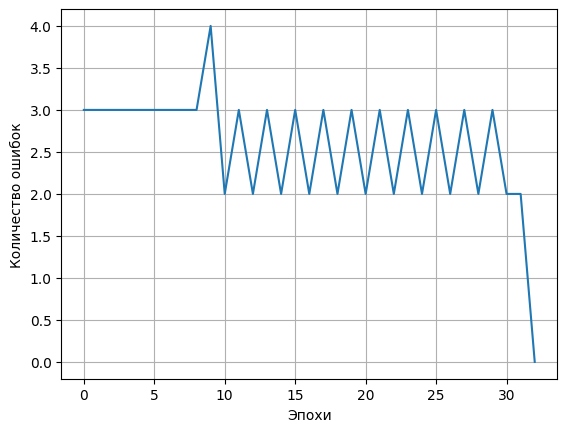

In [12]:
train = np.array([[0,1,0], # короткие волосы, брюки, без духов - юноша
                  [1,0,0], # длинные волосы, без брюк, без духов - девушка
                  [1,1,1], # длинные волосы, брюки, духи - девушка
                  [0,1,1]]) # короткие волосы, брюки, духи - юноша

target = np.array([[1],
                   [0],
                   [0],
                   [1]])

weights = np.array([[20],
                    [5],
                    [10]])

weights, errs, epochs = simple_net(train, target, weights=weights, max_iter=100, learning_rate=0.5, display=True)


fig, ax = plt.subplots()

ax.plot(range(epochs), errs)
ax.grid()

#  Добавляем подписи к осям:
ax.set_xlabel('Эпохи')
ax.set_ylabel('Количество ошибок')

plt.show()

Если сделать 100 эпох

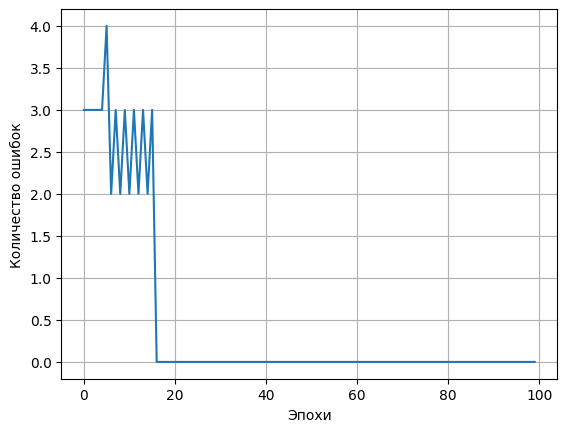

In [11]:
train = np.array([[0,1,0], # короткие волосы, брюки, без духов - юноша
                  [1,0,0], # длинные волосы, без брюк, без духов - девушка
                  [1,1,1], # длинные волосы, брюки, духи - девушка
                  [0,1,1]]) # короткие волосы, брюки, духи - юноша
target = np.array([[1],
                   [0],
                   [0],
                   [1]])
weights = np.array([[20],
                    [5],
                    [10]])

weights, errs, epochs = simple_net(train, target, weights=weights, max_iter=1, learning_rate=0.99)


print(weights)
print(predict([0, 0, 0], weights)) 
print(predict([1, 1, 1], weights))
print(predict([0, 0, 1], weights))
print(predict([1, 0, 1], weights))
print(predict([0, 1, 0], weights))

max iterations 1 exceed
[[18.02]
 [ 5.  ]
 [ 9.01]]
0
1
0
1
0


*Метод обратного распространения ошибок

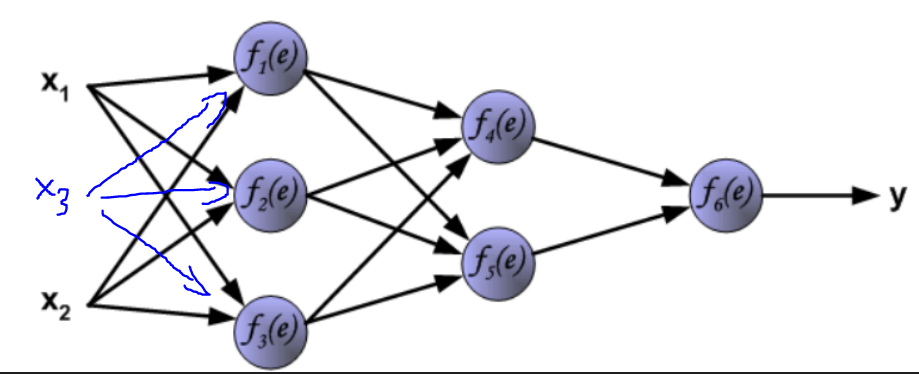

in epoch 5898 eps=0.1 is reached
[0.79731481]
[0.02543652]
[0.03326067]
[0.02058307]
[0.99089603]


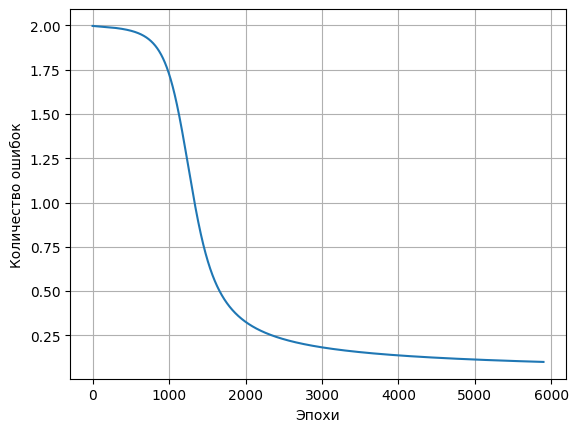

In [4]:
import numpy as np

def sigmoida(x, deriv=False):
    if(deriv == True):
        return sigmoida(x, deriv=False) * (1 - sigmoida(x, deriv=False))
    return 1 / (1 + np.exp(-x))


def mse_loss(y_true, y_pred):
  return ((y_true - y_pred) ** 2).mean()
    

train = np.array([[0,1,0], # короткие волосы, брюки, без духов - юноша
                  [1,0,0], # длинные волосы, без брюк, без духов - девушка
                  [1,1,1], # длинные волосы, брюки, духи - девушка
                  [0,1,1]]) # короткие волосы, брюки, духи - юноша

target = np.array([[1],
                   [0],
                   [0],
                   [1]])


INPUTS = 3
LEVEL1 = 3
LEVEL2 = 2
LEVEL3 = 1


np.random.seed(1)
W1 = 2*np.random.random((LEVEL1, INPUTS)) - 1
W2 = 2*np.random.random((LEVEL2, LEVEL1)) - 1
W3 = 2*np.random.random((LEVEL3, LEVEL2)) - 1

def go_forward(input):
    out1 = sigmoida(np.dot(W1, input))
    out2 = sigmoida(np.dot(W2, out1))
    y = sigmoida(np.dot(W3, out2))
    return y, out2, out1


max_iter = 60000
epoch = 0
errs = []
lmd = 0.1
eps = 0.1
display = True
while True:
    epoch += 1
    sum_err = 0
    for row in range(len(train)):
        input_layer = train[row].reshape(INPUTS, 1)
        
        y, out2, out1 = go_forward(input_layer)
        err =  y - target[row].reshape(1, 1)
        if epoch % 10000 == 0:
            print(f"{epoch=} {err[0][0]=}")

        delta = err * y * (1 - y)
        W3 = W3 - lmd * np.dot(delta, out2.T)

        delta2 = np.dot(W3.T, delta) * out2 * (1 - out2) 
        W2 = W2 - lmd * np.dot(delta2, out1.T)

        delta3 = np.dot(W2.T, delta2) * out1 * (1 - out1)
        W1 = W1 - lmd * np.dot(input_layer, delta3.T)
        sum_err += abs(err[0][0])
    errs.append(sum_err)
    if (sum_err <= eps):
        print(f"in epoch {epoch} {eps=} is reached")
        break
        # return W1, W2, W3, errs, epoch
    if epoch >= max_iter:
        print(f"max iterations {max_iter}")
        break
        # return W1, W2, W3, errs, epoch

    
print(go_forward([0, 0, 0])[0]) 
print(go_forward([1, 1, 1])[0])
print(go_forward([0, 0, 1])[0])
print(go_forward([1, 0, 1])[0])
print(go_forward([0, 1, 0])[0])

fig, ax = plt.subplots()

ax.plot(range(epoch), errs)
ax.grid()

#  Добавляем подписи к осям:
ax.set_xlabel('Эпохи')
ax.set_ylabel('Количество ошибок')
plt.show()
